In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
uber_analysis = pd.read_csv(r"C:\Users\kanis\OneDrive\Desktop\Data_Analysis\Uber Drives.csv")
uber_analysis.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Concise summary of the DataFrame
print(uber_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [4]:
#Data Preparation and Cleaning

In [5]:
#Renaming the columns
uber_analysis.rename(columns={
    'START_DATE*': 'Start_Date',
    'END_DATE*': 'End_Date',
    'CATEGORY*': 'Category',
    'START*': 'Start_Location',
    'STOP*': 'Stop_Location',
    'MILES*': 'Miles',
    'PURPOSE*': 'Purpose'
}, inplace=True)
uber_analysis.head()

,Start_Date,End_Date,Category,Start_Location,Stop_Location,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
uber_analysis.shape

(1156, 7)

In [7]:
uber_analysis.dtypes

Start_Date         object
End_Date           object
Category           object
Start_Location     object
Stop_Location      object
Miles             float64
Purpose            object
dtype: object

In [8]:
uber_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Start_Date      1156 non-null   object 
 1   End_Date        1155 non-null   object 
 2   Category        1155 non-null   object 
 3   Start_Location  1155 non-null   object 
 4   Stop_Location   1155 non-null   object 
 5   Miles           1156 non-null   float64
 6   Purpose         653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
#Check for Missing values
uber_analysis.duplicated().sum()

1

In [10]:
uber_analysis.isnull().sum()


Start_Date          0
End_Date            1
Category            1
Start_Location      1
Stop_Location       1
Miles               0
Purpose           503
dtype: int64

In [11]:
print(uber_analysis.nunique())


Start_Date        1155
End_Date          1154
Category             2
Start_Location     177
Stop_Location      188
Miles              257
Purpose             10
dtype: int64


In [12]:
#Solve the problem of missing values
uber_analysis['Purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: Purpose, dtype: int64

In [13]:
uber_analysis['Purpose'].fillna(method='ffill',inplace=True)
uber_analysis.head(10)

,Start_Date,End_Date,Category,Start_Location,Stop_Location,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [14]:
#Solve start and end date and time converting to datetime
uber_analysis['START_DATE'] = pd.to_datetime(uber_analysis['Start_Date'], errors='coerce')
uber_analysis['END_DATE'] = pd.to_datetime(uber_analysis['End_Date'], errors='coerce')
uber_analysis.head(10)

,Start_Date,End_Date,Category,Start_Location,Stop_Location,Miles,Purpose,START_DATE,END_DATE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:25:00,2016-01-02 01:37:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06 17:30:00,2016-01-06 17:35:00
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting,2016-01-07 13:27:00,2016-01-07 13:33:00
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting,2016-01-10 08:05:00,2016-01-10 08:25:00
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10 12:17:00,2016-01-10 12:44:00


In [15]:
# Seperate the date and time and month and year
uber_analysis['Start_date'] = uber_analysis['START_DATE'].dt.date
uber_analysis['Start_time'] = uber_analysis['START_DATE'].dt.time
uber_analysis['End_date'] = uber_analysis['END_DATE'].dt.date
uber_analysis['End_time'] = uber_analysis['END_DATE'].dt.time
uber_analysis['Month'] = uber_analysis['START_DATE'].dt.month
uber_analysis['Year'] = uber_analysis['START_DATE'].dt.year
uber_analysis.head(10)

,Start_Date,End_Date,Category,Start_Location,Stop_Location,Miles,Purpose,START_DATE,END_DATE,Start_date,Start_time,End_date,End_time,Month,Year
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:25:00,2016-01-02 01:37:00,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,2016-01-05,17:31:00,2016-01-05,17:45:00,1.0,2016.0
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,2016-01-06,14:42:00,2016-01-06,15:49:00,1.0,2016.0
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,2016-01-06,17:15:00,2016-01-06,17:19:00,1.0,2016.0
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06 17:30:00,2016-01-06 17:35:00,2016-01-06,17:30:00,2016-01-06,17:35:00,1.0,2016.0
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting,2016-01-07 13:27:00,2016-01-07 13:33:00,2016-01-07,13:27:00,2016-01-07,13:33:00,1.0,2016.0
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting,2016-01-10 08:05:00,2016-01-10 08:25:00,2016-01-10,08:05:00,2016-01-10,08:25:00,1.0,2016.0
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10 12:17:00,2016-01-10 12:44:00,2016-01-10,12:17:00,2016-01-10,12:44:00,1.0,2016.0


In [16]:
# Remove START_DATE END_DATE and rearrange the columns
uber_analysis.drop(columns=['Start_Date', 'End_Date'], inplace=True, errors='ignore')
uber_analysis = uber_analysis[['Start_date','Start_time','End_date','End_time','Month','Year','Category','Start_Location','Stop_Location','Miles','Purpose']]
uber_analysis.head(10)

,Start_date,Start_time,End_date,End_time,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1.0,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1.0,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1.0,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1.0,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1.0,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1.0,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1.0,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [17]:
uber_analysis.Month.value_counts()

12.0    146
8.0     133
11.0    122
2.0     115
3.0     113
7.0     112
6.0     108
10.0    106
1.0      61
4.0      54
5.0      49
9.0      36
Name: Month, dtype: int64

In [18]:
uber_analysis.Month.isnull().sum()

1

In [19]:
# Convert month to integer
uber_analysis['Month'] = uber_analysis['Month'].fillna(uber_analysis['Month'].mode()[0])
uber_analysis['Month'] = uber_analysis['Month'].astype(int)
uber_analysis.head(10)

,Start_date,Start_time,End_date,End_time,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [20]:
# Convert month to integer
uber_analysis['Month'] = uber_analysis['Month'].fillna(uber_analysis['Month'].mode()[0])
uber_analysis['Month'] = uber_analysis['Month'].astype(int)
uber_analysis.head(10)

,Start_date,Start_time,End_date,End_time,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [21]:
uber_analysis.Month.count()


1156

In [22]:
# Convert year to integer
uber_analysis['Year'] = uber_analysis['Year'].fillna(uber_analysis['Year'].mode()[0])
uber_analysis['Year'] = uber_analysis['Year'].astype(int)

In [23]:
uber_analysis.dtypes

Start_date         object
Start_time         object
End_date           object
End_time           object
Month               int32
Year                int32
Category           object
Start_Location     object
Stop_Location      object
Miles             float64
Purpose            object
dtype: object

In [24]:
# Convert start_time and end_time to hours and minutes
uber_analysis['Start_hour'] = uber_analysis['Start_time'].apply(lambda x: x.hour)
uber_analysis['Start_minute'] = uber_analysis['Start_time'].apply(lambda x: x.minute)
uber_analysis['End_hour'] = uber_analysis['End_time'].apply(lambda x: x.hour)
uber_analysis['End_minute'] = uber_analysis['End_time'].apply(lambda x: x.minute)

In [25]:
# Rearrange the columns and drop start_time and end_time columns
uber_analysis = uber_analysis[['Start_date','Start_hour','Start_minute','End_date','End_hour','End_minute','Month','Year','Category','Start_Location','Stop_Location','Miles','Purpose']]

In [26]:
uber_analysis.head(10)

,Start_date,Start_hour,Start_minute,End_date,End_hour,End_minute,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20.0,25.0,2016-01-02,20.0,38.0,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17.0,31.0,2016-01-05,17.0,45.0,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14.0,42.0,2016-01-06,15.0,49.0,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17.0,15.0,2016-01-06,17.0,19.0,1,2016,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17.0,30.0,2016-01-06,17.0,35.0,1,2016,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13.0,27.0,2016-01-07,13.0,33.0,1,2016,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,8.0,5.0,2016-01-10,8.0,25.0,1,2016,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12.0,17.0,2016-01-10,12.0,44.0,1,2016,Business,Jamaica,New York,16.5,Customer Visit


In [27]:
# Create a new column for duration of the trip to be in minutes
uber_analysis['Duration'] = uber_analysis['End_hour']*60 + uber_analysis['End_minute'] - (uber_analysis['Start_hour']*60 + uber_analysis['Start_minute'])

In [28]:
# Convert miles to km
uber_analysis['Miles'] = uber_analysis['Miles']*1.60934
#calculate speed
uber_analysis['Speed'] = uber_analysis['Miles']/(uber_analysis['Duration']/60)
uber_analysis.head(10)

,Start_date,Start_hour,Start_minute,End_date,End_hour,End_minute,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose,Duration,Speed
0,2016-01-01,21.0,11.0,2016-01-01,21.0,17.0,1,2016,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,6.0,82.076340
1,2016-01-02,1.0,25.0,2016-01-02,1.0,37.0,1,2016,Business,Fort Pierce,Fort Pierce,8.046700,Meal/Entertain,12.0,40.233500
2,2016-01-02,20.0,25.0,2016-01-02,20.0,38.0,1,2016,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,13.0,35.653071
3,2016-01-05,17.0,31.0,2016-01-05,17.0,45.0,1,2016,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,14.0,32.416706
4,2016-01-06,14.0,42.0,2016-01-06,15.0,49.0,1,2016,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,67.0,91.804440
5,2016-01-06,17.0,15.0,2016-01-06,17.0,19.0,1,2016,Business,West Palm Beach,West Palm Beach,6.920162,Meal/Entertain,4.0,103.802430
6,2016-01-06,17.0,30.0,2016-01-06,17.0,35.0,1,2016,Business,West Palm Beach,Palm Beach,11.426314,Meeting,5.0,137.115768
7,2016-01-07,13.0,27.0,2016-01-07,13.0,33.0,1,2016,Business,Cary,Cary,1.287472,Meeting,6.0,12.874720
8,2016-01-10,8.0,5.0,2016-01-10,8.0,25.0,1,2016,Business,Cary,Morrisville,13.357522,Meeting,20.0,40.072566
9,2016-01-10,12.0,17.0,2016-01-10,12.0,44.0,1,2016,Business,Jamaica,New York,26.554110,Customer Visit,27.0,59.009133


In [29]:
uber_analysis.describe()


,Start_hour,Start_minute,End_hour,End_minute,Month,Year,Miles,Duration,Speed
count,1155.000000,1155.000000,1155.000000,1155.000000,1156.000000,1156.0,1156.000000,1155.000000,1155.000000
mean,14.696104,29.128139,14.794805,28.994805,6.987024,2016.0,33.981854,5.788745,inf
std,4.575226,17.191727,4.775222,17.547755,3.546452,0.0,578.234265,154.891874,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,0.804670,-1432.000000,-17.107984
25%,12.000000,14.000000,12.000000,14.000000,3.750000,2016.0,4.667086,10.000000,23.571879
50%,15.000000,29.000000,15.000000,29.000000,7.000000,2016.0,9.656040,16.000000,33.357229
75%,18.000000,44.000000,18.000000,44.000000,10.000000,2016.0,16.737136,27.000000,45.622351
max,23.000000,59.000000,23.000000,59.000000,12.000000,2016.0,19641.511898,330.000000,inf


In [30]:
# Found problem in speed that have negative value
uber_analysis.Speed.min()

uber_analysis[uber_analysis["Speed"]== -27.53256283061739]

,Start_date,Start_hour,Start_minute,End_date,End_hour,End_minute,Month,Year,Category,Start_Location,Stop_Location,Miles,Purpose,Duration,Speed


In [31]:
# Data Visualization

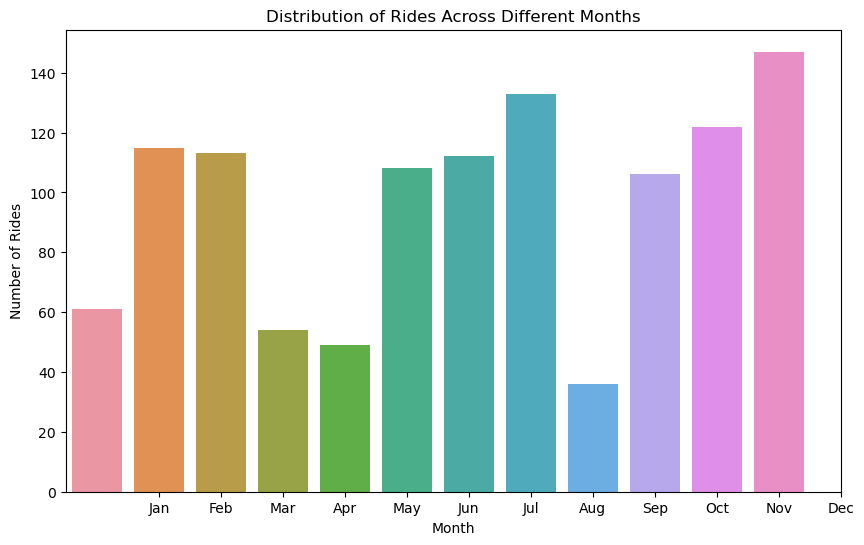

In [32]:
# 1)Distribution of Months
plt.figure(figsize=(10, 6))
sn.countplot(data=uber_analysis, x='Month', order=sorted(uber_analysis['Month'].unique()))
plt.title('Distribution of Rides Across Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

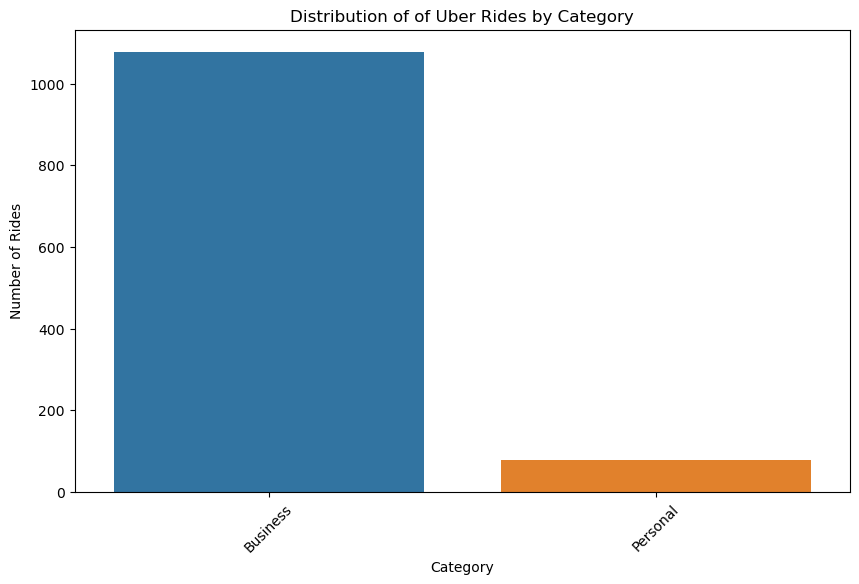

In [33]:
# 2)Distribution of Categories
plt.figure(figsize=(10, 6))
sn.countplot(data=uber_analysis, x='Category')
plt.title('Distribution of of Uber Rides by Category')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

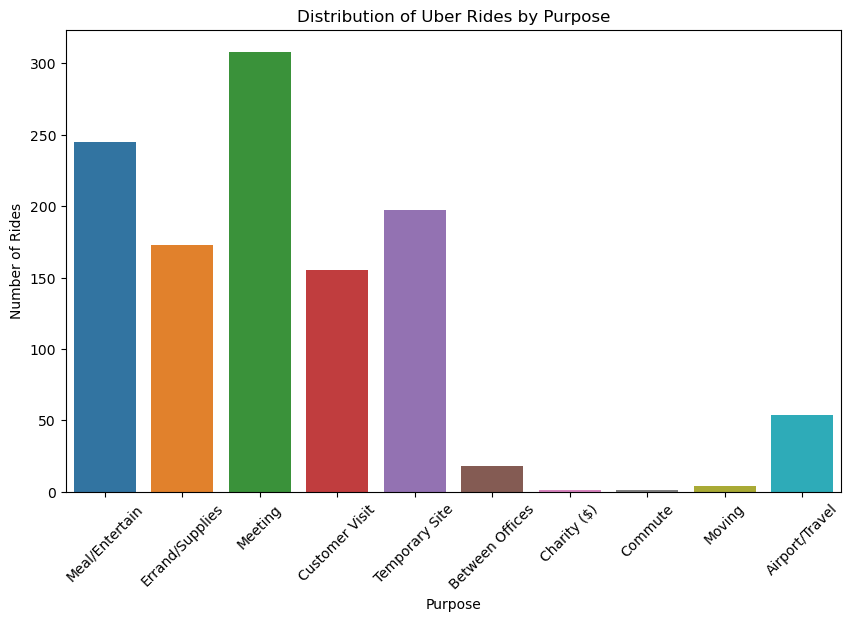

In [34]:
# 3) Distribution by Purpose
plt.figure(figsize=(10,6))
sn.countplot(data=uber_analysis, x='Purpose')
plt.title('Distribution of Uber Rides by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


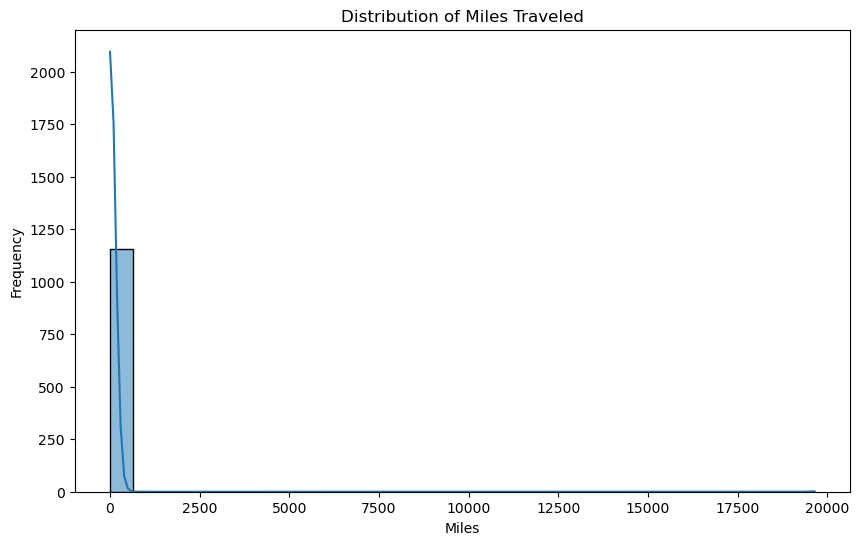

In [35]:
# 4)Distribution of Miles
plt.figure(figsize=(10, 6))
sn.histplot(uber_analysis['Miles'], bins=30, kde=True)  # Add kde=True for kernel density estimate
plt.title('Distribution of Miles Traveled')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

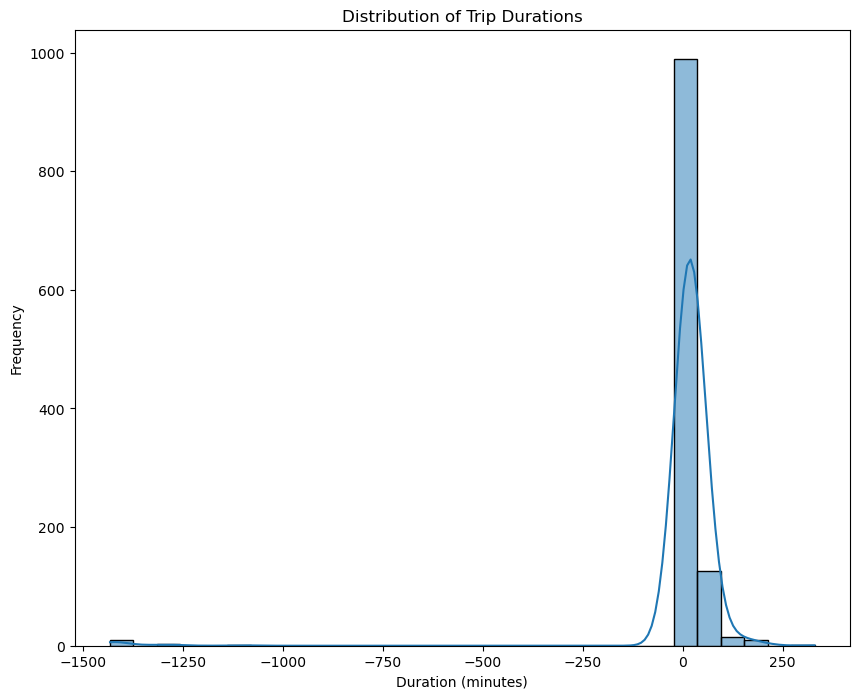

In [36]:
# 5)Distribution of Duration
plt.figure(figsize=(10, 8))
sn.histplot(uber_analysis['Duration'], bins=30, kde=True)  # Add kde=True for kernel density estimate
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

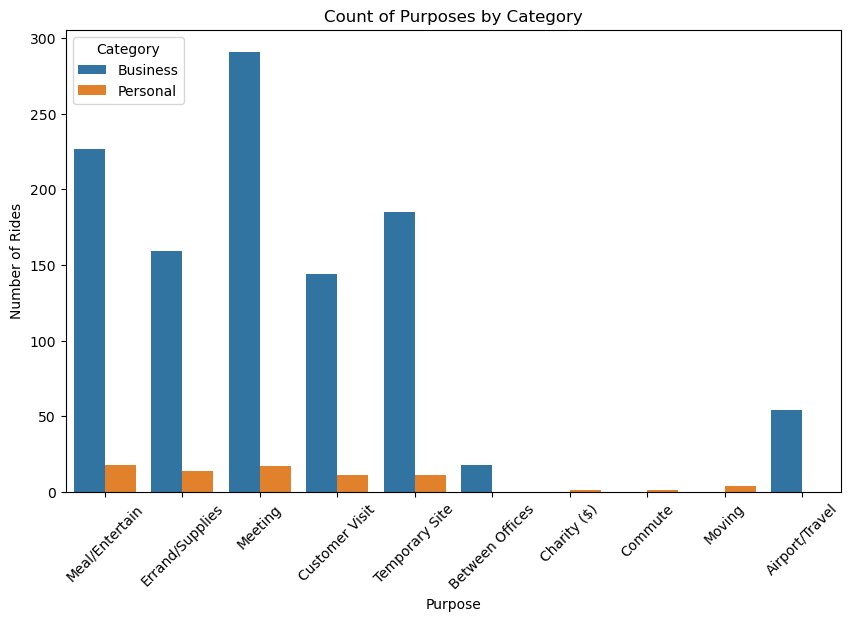

In [37]:
# 6) Count Plot of Purpose by Category
plt.figure(figsize=(10, 6))
sn.countplot(data=uber_analysis, x='Purpose', hue='Category')
plt.title('Count of Purposes by Category')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Category')
plt.show()

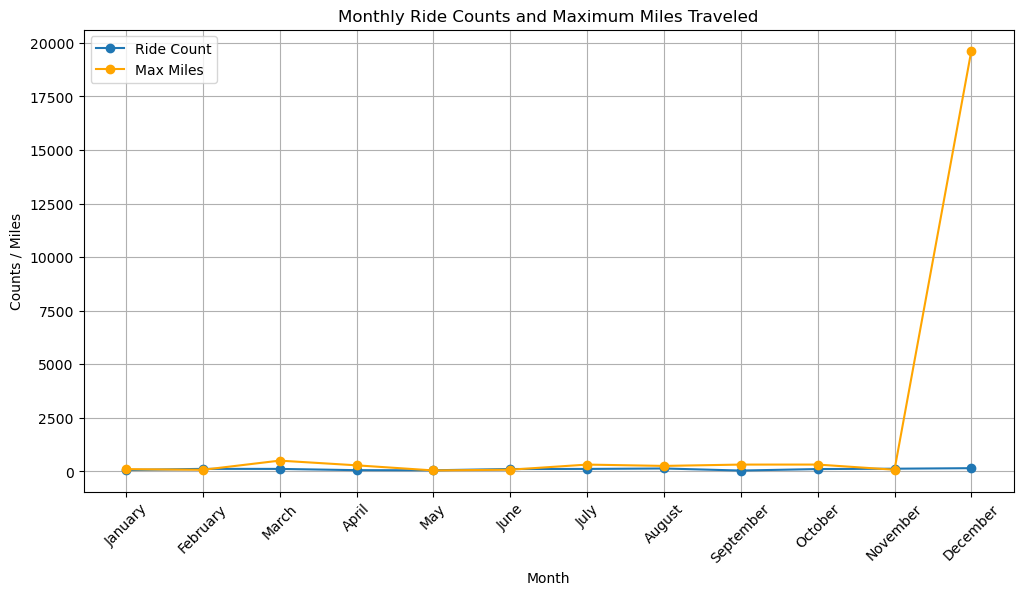

In [38]:
# 7) Monthly Analysis: - Map month numbers to month names. - Calculate the value counts of rides for each month and the maximum miles traveled in each 
# month.     - Create a line plot to visualize the monthly ride counts and maximum miles.

month_mapping = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

# Add month names to the DataFrame
uber_analysis['Month_Name'] = uber_analysis['Month'].map(month_mapping)
#uber_analysis.head(10)

# Calculate ride counts and maximum miles for each month
monthly_analysis = uber_analysis.groupby('Month_Name').agg(
    Ride_Count=('Month', 'count'),
    Max_Miles=('Miles', 'max')
).reset_index()

# Sort the DataFrame by month order
monthly_analysis['Month_Number'] = monthly_analysis['Month_Name'].map({v: k for k, v in month_mapping.items()})
monthly_analysis = monthly_analysis.sort_values('Month_Number').drop('Month_Number', axis=1)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_analysis['Month_Name'], monthly_analysis['Ride_Count'], marker='o', label='Ride Count')
plt.plot(monthly_analysis['Month_Name'], monthly_analysis['Max_Miles'], marker='o', label='Max Miles', color='orange')
plt.title('Monthly Ride Counts and Maximum Miles Traveled')
plt.xlabel('Month')
plt.ylabel('Counts / Miles')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


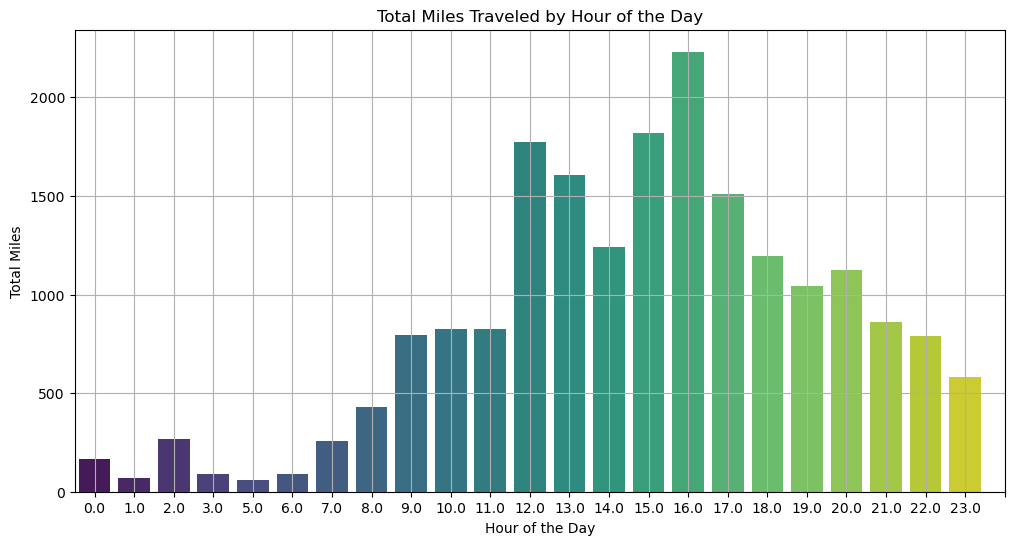

In [39]:
# 8) Day Time Vs Miles - Grouping by start hour to calculate total miles traveled
hourly_miles = uber_analysis.groupby('Start_hour')['Miles'].sum().reset_index()

# Plotting the relationship
plt.figure(figsize=(12, 6))
sn.barplot(data=hourly_miles, x='Start_hour', y='Miles', palette='viridis')
plt.title('Total Miles Traveled by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Miles')
plt.xticks(ticks=range(24))  # Ensure all hours are shown
plt.grid()
plt.show()

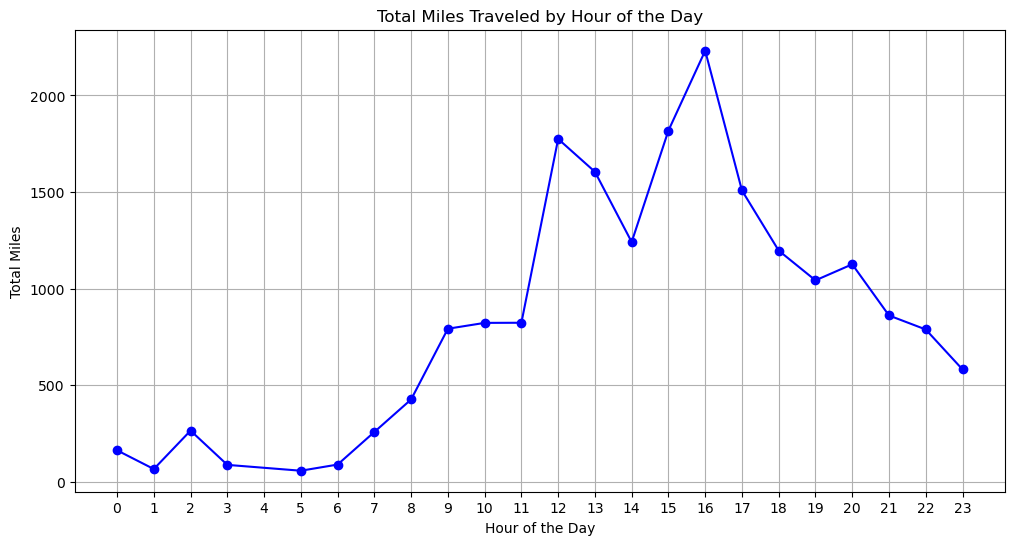

In [40]:
# Grouping by start hour to calculate total miles traveled
hourly_miles = uber_analysis.groupby('Start_hour')['Miles'].sum().reset_index()

# Plotting the relationship using a line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_miles['Start_hour'], hourly_miles['Miles'], marker='o', color='blue', linestyle='-')
plt.title('Total Miles Traveled by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Miles')
plt.xticks(ticks=range(24))  # Ensure all hours are shown
plt.grid()
plt.show()


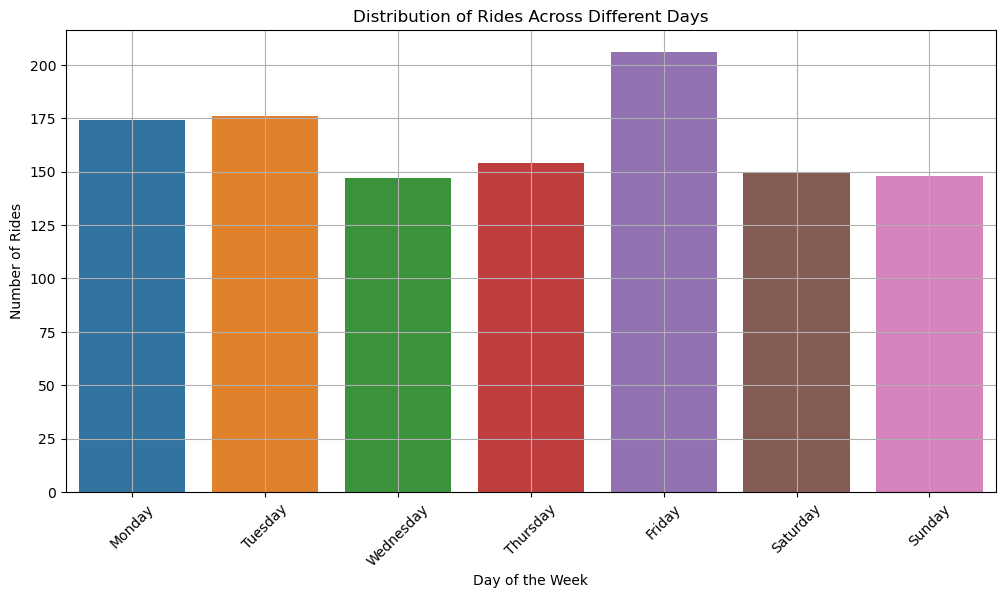

In [41]:
# 9)Day Distribution:- Plot the distribution of rides across different days using a count plot. Convert Start_date to datetime if not already


uber_analysis['Start_date'] = pd.to_datetime(uber_analysis['Start_date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
uber_analysis['Day_of_Week'] = uber_analysis['Start_date'].dt.day_name()

# Plotting the distribution of rides by day
plt.figure(figsize=(12, 6))
sn.countplot(data=uber_analysis, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Rides Across Different Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [42]:
# Save the cleaned DataFrame to a new CSV file
uber_analysis.to_csv(r"C:\Users\kanis\OneDrive\Desktop\Data_Analysis\UberDatasetCleaned.csv", index=False)


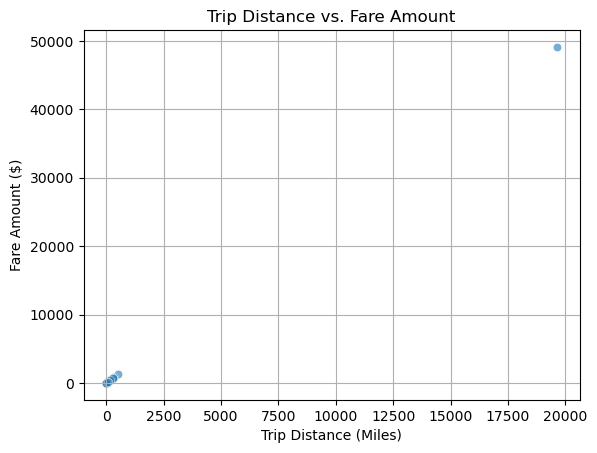

In [43]:
# 10) Scatter plot for Trip Distance vs Fare Amount
uber_analysis['Fare_Amount'] = uber_analysis['Miles'] * 2.5  # Example fare calculation (e.g., $2.5 per mile)
sn.scatterplot(data=uber_analysis, x='Miles', y='Fare_Amount', alpha=0.6)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.show()

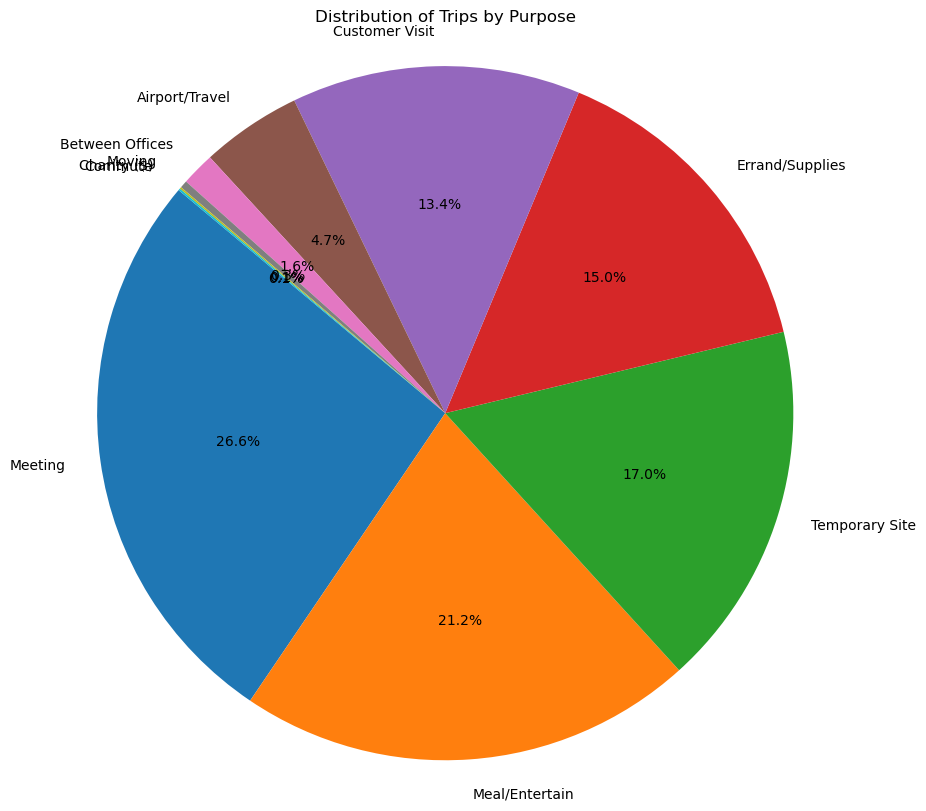

In [44]:
# 11) Pie Chart - Distribution of Trips by Purpose# Assuming you have a column 'Purpose' in your dataset, Count the number of trips for each purpose
purpose_counts = uber_analysis['Purpose'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Trips by Purpose')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

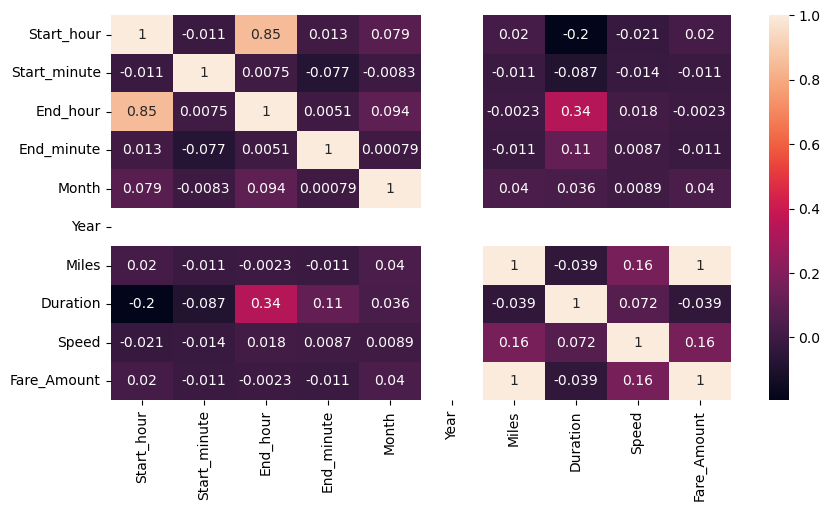

In [45]:
#12) Coorelation Anlaysis - plot the heatmap
plt.figure(figsize=(10,5))
sn.heatmap(uber_analysis.corr(),annot=True)
plt.show()

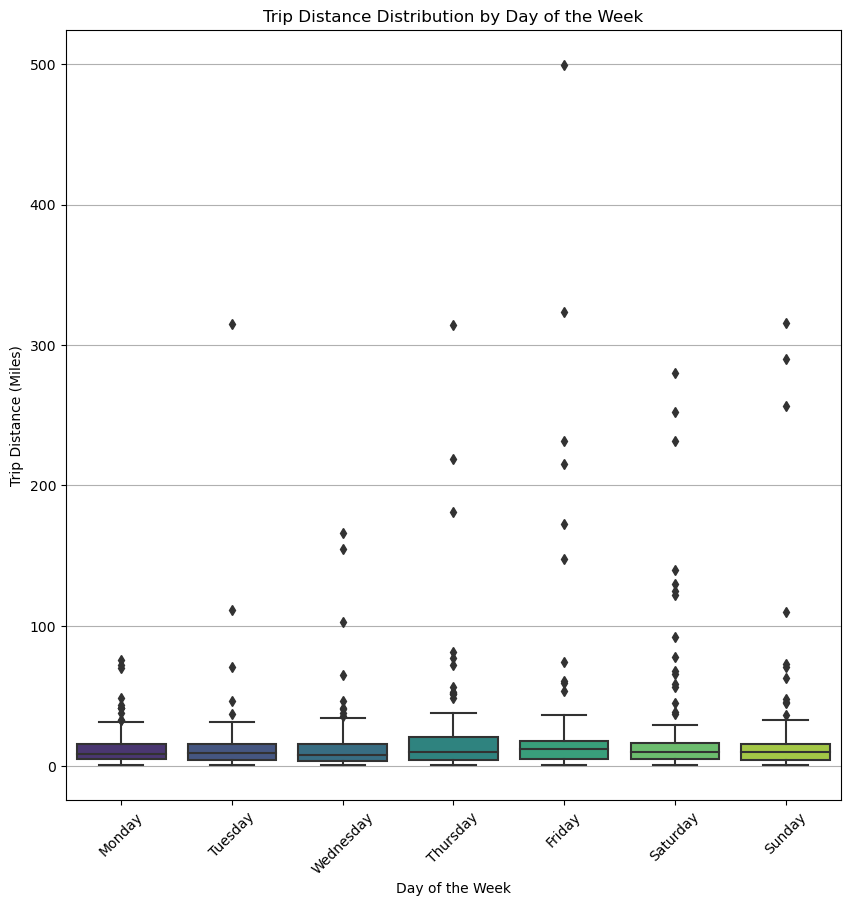

In [46]:
# 13)Trip Distance Distribution by Day of the Week 
uber_analysis['Day_of_Week'] = pd.Categorical(uber_analysis['Day_of_Week'], 
                                               categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                               ordered=True)

# Plotting the box plot for trip distance by day of the week
plt.figure(figsize=(10, 10))
sn.boxplot(data=uber_analysis, x='Day_of_Week', y='Miles', palette='viridis')
plt.title('Trip Distance Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Distance (Miles)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')
plt.show()